In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications.resnet50 import ResNet50

In [2]:
# Data loading using keras
training_set = tf.keras.utils.image_dataset_from_directory(
    'new_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10960 files belonging to 30 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3706 files belonging to 30 classes.


In [4]:
# Load the base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [5]:
# Freeze all the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [7]:
# Define the model
from tensorflow.keras.layers import Dropout
model = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │        30,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,379,934 (482.10 MB)

 Trainable params: 102,792,222 (392.12 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from keras.callbacks import  EarlyStopping
callback =EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [11]:
# Fit the model
training_model=model.fit(training_set, epochs=10, validation_data=validation_set , callbacks=callback)

Epoch 1/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 796s 2s/step - accuracy: 0.6934 - loss: 13.2581 - val_accuracy: 0.8575 - val_loss: 0.7428
Epoch 2/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 745s 2s/step - accuracy: 0.9002 - loss: 0.6546 - val_accuracy: 0.9199 - val_loss: 0.4808
Epoch 3/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 751s 2s/step - accuracy: 0.9096 - loss: 0.7314 - val_accuracy: 0.8969 - val_loss: 0.6861
Epoch 4/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 745s 2s/step - accuracy: 0.9111 - loss: 0.7075 - val_accuracy: 0.9150 - val_loss: 0.5143
Epoch 5/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 740s 2s/step - accuracy: 0.8998 - loss: 0.7728 - val_accuracy: 0.9255 - val_loss: 0.4947
Epoch 6/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 744s 2s/step - accuracy: 0.9278 - loss: 0.5086 - val_accuracy: 0.9304 - val_loss: 0.3313
Epoch 7/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 744s 2s/step - accuracy: 0.9219 - loss: 0.5435 - val_accuracy: 0.9255 - val_loss: 0.8462
Epoch 8/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 739s 2s/step - accuracy: 0.9039 - loss: 0.9887 - val_acc

In [12]:
# model evaluation on training set

training_loss , train_accuracy = model.evaluate(training_set)

343/343 ━━━━━━━━━━━━━━━━━━━━ 555s 2s/step - accuracy: 0.9958 - loss: 0.0178


In [13]:
# model evaluation on training set

validation_loss , validation_accuracy = model.evaluate(validation_set)

116/116 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.9169 - loss: 0.6565


In [14]:
tf.keras.callbacks.History()

In [15]:
training_model.history

{'accuracy': [0.8089416027069092,
  0.8949817419052124,
  0.9002737402915955,
  0.9106751680374146,
  0.9081204533576965,
  0.9285584092140198,
  0.9201642274856567,
  0.906751811504364,
  0.9222627878189087,
  0.930656909942627],
 'loss': [4.516452789306641,
  0.6956006288528442,
  0.8361276388168335,
  0.676421046257019,
  0.7451204061508179,
  0.5195891261100769,
  0.670394778251648,
  0.9641044735908508,
  0.7682079076766968,
  0.6746843457221985],
 'val_accuracy': [0.8575283288955688,
  0.9198597073554993,
  0.8969238996505737,
  0.915002703666687,
  0.9255262017250061,
  0.9303831458091736,
  0.9255262017250061,
  0.907717227935791,
  0.9128440618515015,
  0.9166216850280762],
 'val_loss': [0.7427842617034912,
  0.48081234097480774,
  0.6861141324043274,
  0.5142781138420105,
  0.4947396516799927,
  0.3313305377960205,
  0.8461830019950867,
  0.7736989855766296,
  0.7519863843917847,
  0.65156090259552]}

In [16]:
# viz

epochs = [i for i in range(1,11)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

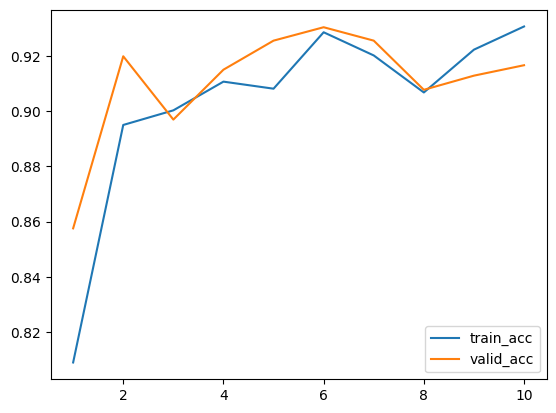

In [17]:
plt.plot(epochs,training_model.history['accuracy'] , label = 'train_acc')
plt.plot(epochs,training_model.history['val_accuracy'] , label='valid_acc')
plt.legend()
plt.show()

In [18]:
class_name = validation_set.class_names
class_name

['Arive-Dantu',
 'Basale',
 'Betel',
 'Crape_Jasmine',
 'Curry',
 'Drumstick',
 'Fenugreek',
 'Guava',
 'Hibiscus',
 'Indian_Beech',
 'Indian_Mustard',
 'Jackfruit',
 'Jamaica_Cherry-Gasagase',
 'Jamun',
 'Jasmine',
 'Karanda',
 'Lemon',
 'Mango',
 'Mexican_Mint',
 'Mint',
 'Neem',
 'Oleander',
 'Parijata',
 'Peepal',
 'Pomegranate',
 'Rasna',
 'Rose_apple',
 'Roxburgh_fig',
 'Sandalwood',
 'Tulsi']

In [22]:
test_set =tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=False,# one by one check all the directory
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3706 files belonging to 30 classes.


In [23]:
y_pred = model.predict(test_set)
y_pred

116/116 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step


array([[1.2750816e-01, 5.0426643e-05, 7.3790812e-04, ..., 5.5934843e-06,
        8.9430604e-03, 3.7401979e-04],
       [4.4074557e-03, 2.2709814e-06, 1.1077146e-07, ..., 2.4667283e-08,
        1.4043494e-05, 7.5732413e-07],
       [9.8984855e-01, 1.0458816e-07, 5.2613530e-07, ..., 5.0480562e-06,
        1.5701494e-06, 5.5936730e-04],
       ...,
       [6.9288135e-14, 4.1437639e-22, 2.4881345e-23, ..., 4.3294586e-23,
        4.8240567e-13, 1.0000000e+00],
       [3.1526951e-12, 5.3777621e-18, 4.7956063e-21, ..., 1.2188030e-21,
        1.9287245e-10, 9.9999988e-01],
       [2.5433960e-10, 6.0844190e-13, 4.5547005e-16, ..., 2.3869555e-16,
        4.4466660e-07, 9.9939096e-01]], dtype=float32)

In [24]:
predicted_categories= tf.argmax(y_pred,axis=1)

In [25]:
true_categories = tf.concat([y for x,y in test_set] , axis=0)
true_categories #one hot encodding

<tf.Tensor: shape=(3706, 30), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [26]:
y_true= tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(3706,), dtype=int64, numpy=array([ 0,  0,  0, ..., 29, 29, 29], dtype=int64)>

In [27]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_true,predicted_categories ,target_names = class_name))

                         precision    recall  f1-score   support

            Arive-Dantu       0.96      0.51      0.66       128
                 Basale       0.86      1.00      0.93       128
                  Betel       0.99      0.66      0.79       108
          Crape_Jasmine       0.89      0.95      0.92       128
                  Curry       0.70      0.67      0.69       128
              Drumstick       0.97      0.98      0.97       128
              Fenugreek       1.00      1.00      1.00       128
                  Guava       1.00      1.00      1.00       128
               Hibiscus       0.94      0.89      0.91       100
           Indian_Beech       0.98      0.98      0.98       128
         Indian_Mustard       0.80      1.00      0.89       128
              Jackfruit       0.92      0.98      0.95       128
Jamaica_Cherry-Gasagase       0.83      1.00      0.90       128
                  Jamun       0.96      1.00      0.98        90
                Jasmine 

In [28]:
model.save("ResNet.keras")

In [7]:
# add preprocessing layer to the front of VGG
IMAGE_SIZE = [224, 224]
rn = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
# don't train existing weights
for layer in rn.layers:
  layer.trainable = False

In [9]:
x = Flatten()(rn.output)

In [10]:
prediction = Dense(30, activation='softmax')(x)

In [11]:
model = Model(inputs=rn.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 26,598,302 (101.46 MB)

 Trainable params: 3,010,590 (11.48 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
rn = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

Epoch 1/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 988s 3s/step - accuracy: 0.7921 - loss: 7.2085 - val_accuracy: 0.9061 - val_loss: 1.7829
Epoch 2/5


C:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 957s 3s/step - accuracy: 0.9805 - loss: 0.3940 - val_accuracy: 0.9110 - val_loss: 2.5346
Epoch 4/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
343/343 ━━━━━━━━━━━━━━━━━━━━ 954s 3s/step - accuracy: 0.9864 - loss: 0.3259 - val_accuracy: 0.8994 - val_loss: 4.3329


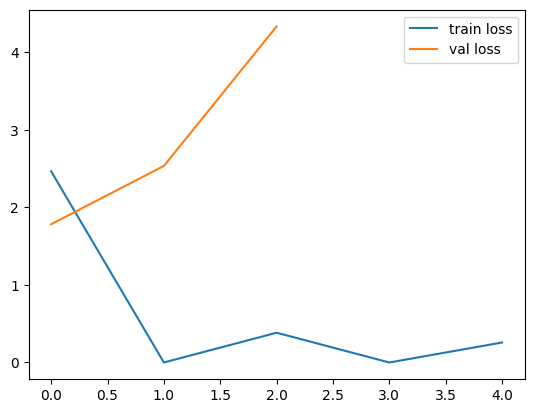

<Figure size 640x480 with 0 Axes>

In [15]:
# loss
plt.plot(rn.history['loss'], label='train loss')
plt.plot(rn.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

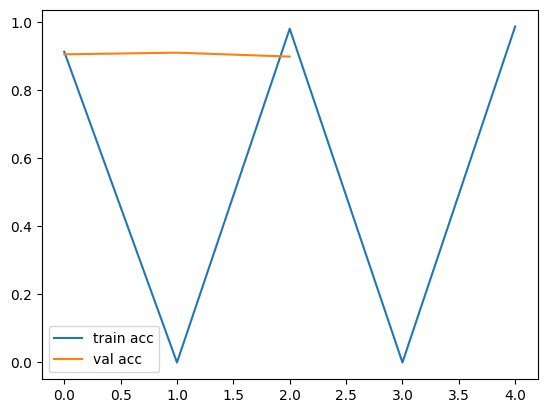

<Figure size 640x480 with 0 Axes>

In [17]:
# accuracies
plt.plot(rn.history['accuracy'], label='train acc')
plt.plot(rn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
import tensorflow as tf

from keras.models import load_model

model.save('ResNet50.keras')